In [1]:
########## 18 June 2018 - Alec S. Hirschauer ##########
# Today I am going to make CMDs and CCDs for NGC 6822 using Python
# drawing from the Khan et al. (2015) Spitzer data set
# matched with the Whitelock et al. (2013) IRSF data set.
#
# I have run a CasJobs query to create a new table of values
# locally saved as a .csv file, with all relevant color terms
# already built in to the spreadsheet.

In [2]:
# First thing needed is to import the relevant Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
# This last line is new, and is necessary for the number density histograms.

In [3]:
# Read in my data from a .csv file saved locally.
phot_data = pd.read_csv('CMDparameters18June2018_ahirschauer.csv')
# This is a table of values with ~30,000 rows which contains the photometric data of
# the Khan et al. (2015) catalog matched to sources from Whitelock et al. (2013)
# with an "OR" command, then downloaded from MAST CasJobs.

In [4]:
# In my first iteration of making CMDs, I found a few erroneous color values well in excess
# of the standard plot boundaries, which made the axes ludicrously proportioned.
# While clearly I could simply define the scale of the axes such that these
# outliers are skipped, if I wanted to do any analysis of the dataset as a whole
# it is more useful for me to trim them.
#
# These erroneous color values were all in the vicinity of +/-10,000, which come from
# the fact that 'null' values in the catalog of photometric sources had been set to "-9999"
# and therefore a small value minus -9,999 becomes roughly 10,000,
# or -9,999 minus a small value becomes roughly -10,000.
#
# Rather than set individual cuts for every afflicted column (as I had tried to do earlier),
# I am making a global cut of the whole dataframe so that no value is outside of the range
# of -500.0 to +500.0, which hopefully encompasses everything useful (including RA & Dec).
#
phot_data = phot_data[(phot_data < 500.0) & (phot_data > -500.0)]
#
# The above command trims the 'phot_data' dataframe,
# but later on when I plot and/or analyze the data,
# I'd like to specify that we're dealing with a "filtered" data set,
# so the command below does that.
#
filter_phot_data = phot_data

In [5]:
# At this point I will re-make all of the CMDs and CCDs from the three previous Python
# notebooks that I had been working on over the last few weeks.
# These are CMD_10May2018.ipynb, CMD_21May2018.ipynb, and CMD_29May2018.ipynb,
# which deal with plots from Sewilo et al. (2013) and Whitney et al. (2008),
# then only 2MASS vs. 2MASS - Spitzer colors, then 2MASS only colors.
#
# The above Python notebooks were redone as CMD_31May2018.ipynb, so this current notebook
# will be a redo of that, using the Whitelock+ data rather than 2MASS.
#
# As with before, I will make each of the plots twice; once using points to represent
# the data, and once utilizing a number density histogram method.

In [6]:
# (1) Here are the plots from CMD_10May2018.ipynb

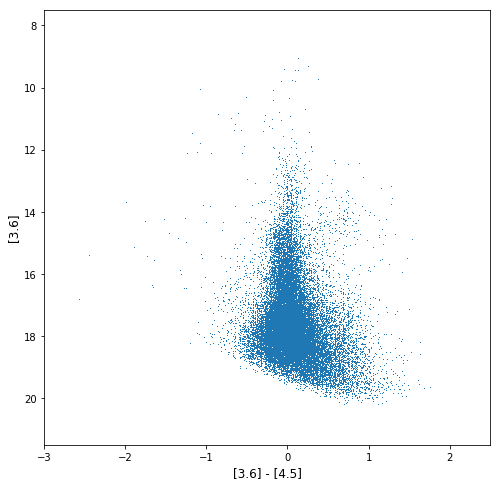

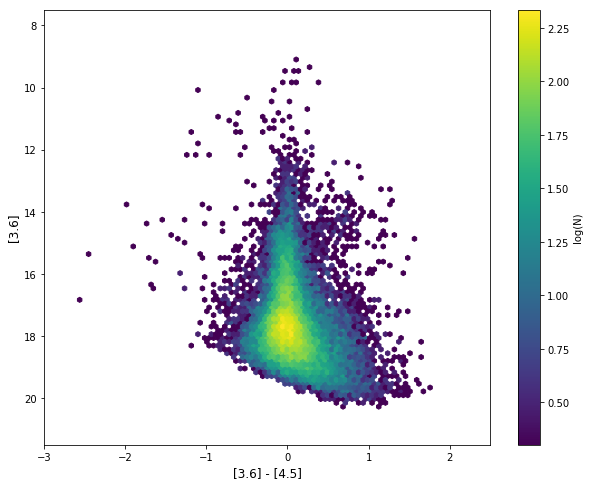

In [7]:
# [3.6] vs. [3.6]-[4.5]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.threesixMINUSfourfive,filter_phot_data.k36mag,',')
plt.xlim(-3.0, 2.5)
plt.ylim(21.5, 7.5)
plt.xlabel('[3.6] - [4.5]', size=12)
plt.ylabel('[3.6]', size=12)
#plt.savefig('[3.6]_vs_[3.6]-[4.5]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.0, 2.5)
plt.ylim(21.5, 7.5)
im1 = ax1.hexbin(filter_phot_data.threesixMINUSfourfive, filter_phot_data.k36mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.0, 2.5, 21.5, 7.5))
ax1.set_xlabel('[3.6] - [4.5]', size=12)
ax1.set_ylabel('[3.6]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[3.6]_vs_[3.6]-[4.5]_hist.pdf')

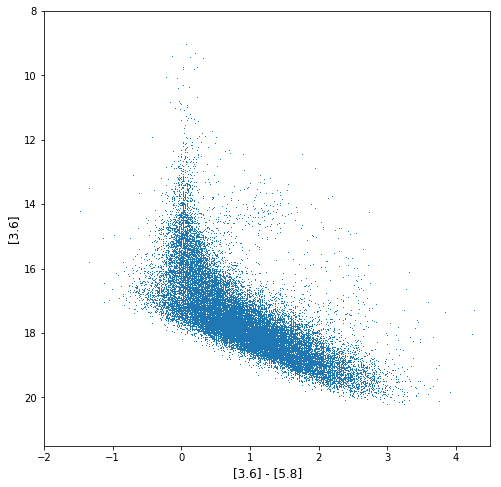

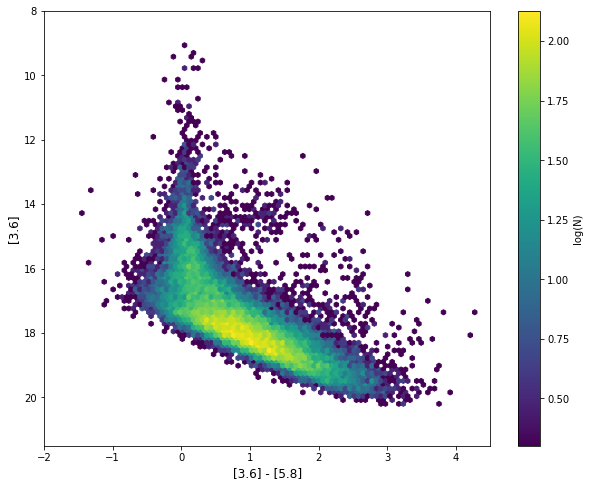

In [8]:
# [3.6] vs. [3.6]-[5.8]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.threesixMINUSfiveeight,filter_phot_data.k36mag,',')
plt.xlim(-2.0, 4.5)
plt.ylim(21.5, 8.0)
plt.xlabel('[3.6] - [5.8]', size=12)
plt.ylabel('[3.6]', size=12)
#plt.savefig('[3.6]_vs_[3.6]-[5.8]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.0, 4.5)
plt.ylim(21.5, 8.0)
im1 = ax1.hexbin(filter_phot_data.threesixMINUSfiveeight, filter_phot_data.k36mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.0, 4.5, 21.5, 8.0))
ax1.set_xlabel('[3.6] - [5.8]', size=12)
ax1.set_ylabel('[3.6]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[3.6]_vs_[3.6]-[5.8]_hist.pdf')

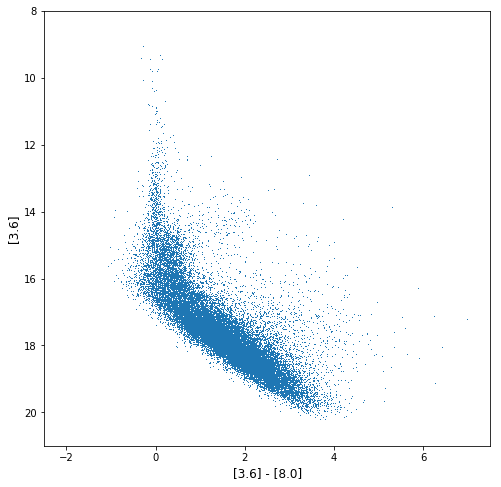

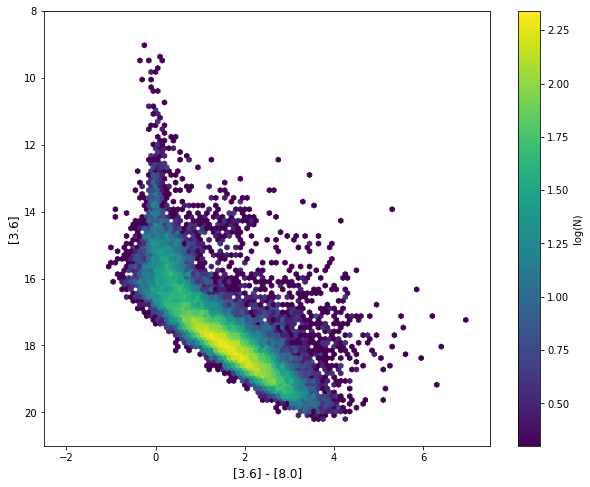

In [9]:
# [3.6] vs. [3.6]-[8.0]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.threesixMINUSeightzero,filter_phot_data.k36mag,',')
plt.xlim(-2.5, 7.5)
plt.ylim(21.0, 8.0)
plt.xlabel('[3.6] - [8.0]', size=12)
plt.ylabel('[3.6]', size=12)
#plt.savefig('[3.6]_vs_[3.6]-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.5, 7.5)
plt.ylim(21.0, 8.0)
im1 = ax1.hexbin(filter_phot_data.threesixMINUSeightzero, filter_phot_data.k36mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.5, 7.5, 21.0, 8.0))
ax1.set_xlabel('[3.6] - [8.0]', size=12)
ax1.set_ylabel('[3.6]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[3.6]_vs_[3.6]-[8.0]_hist.pdf')

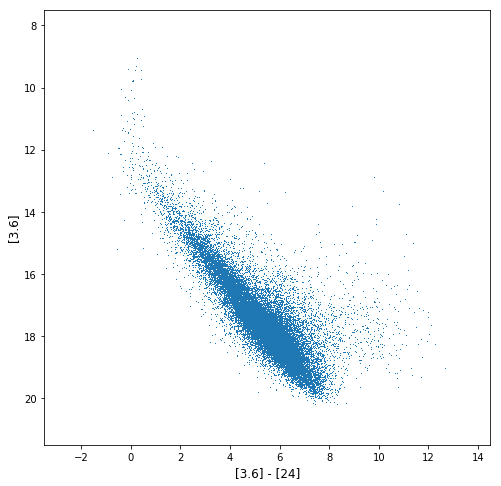

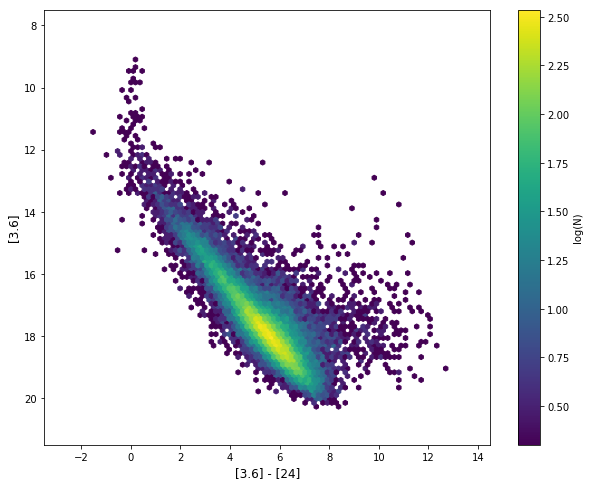

In [10]:
# [3.6] vs. [3.6]-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.threesixMINUStwentyfour,filter_phot_data.k36mag,',')
plt.xlim(-3.5, 14.5)
plt.ylim(21.5, 7.5)
plt.xlabel('[3.6] - [24]', size=12)
plt.ylabel('[3.6]', size=12)
#plt.savefig('[3.6]_vs_[3.6]-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.5, 14.5)
plt.ylim(21.5, 7.5)
im1 = ax1.hexbin(filter_phot_data.threesixMINUStwentyfour, filter_phot_data.k36mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.5, 14.5, 21.5, 7.5))
ax1.set_xlabel('[3.6] - [24]', size=12)
ax1.set_ylabel('[3.6]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[3.6]_vs_[3.6]-[24]_hist.pdf')

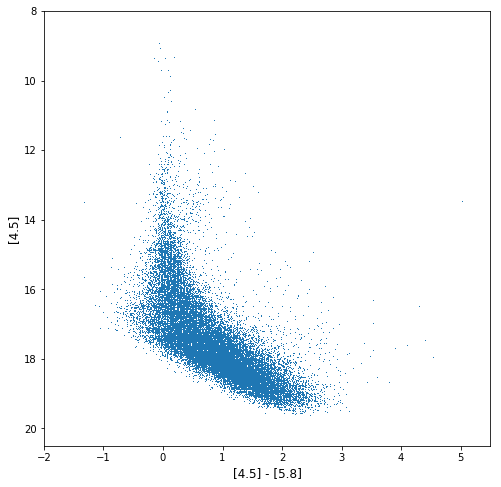

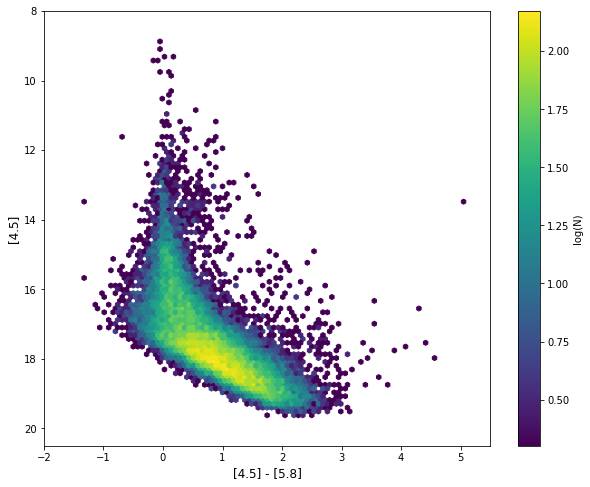

In [11]:
# [4.5] vs. [4.5]-[5.8]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.fourfiveMINUSfiveeight,filter_phot_data.k45mag,',')
plt.xlim(-2.0, 5.5)
plt.ylim(20.5, 8.0)
plt.xlabel('[4.5] - [5.8]', size=12)
plt.ylabel('[4.5]', size=12)
#plt.savefig('[4.5]_vs_[4.5]-[5.8]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.0, 5.5)
plt.ylim(20.5, 8.0)
im1 = ax1.hexbin(filter_phot_data.fourfiveMINUSfiveeight, filter_phot_data.k45mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.0, 5.5, 20.5, 8.0))
ax1.set_xlabel('[4.5] - [5.8]', size=12)
ax1.set_ylabel('[4.5]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[4.5]_vs_[4.5]-[5.8]_hist.pdf')

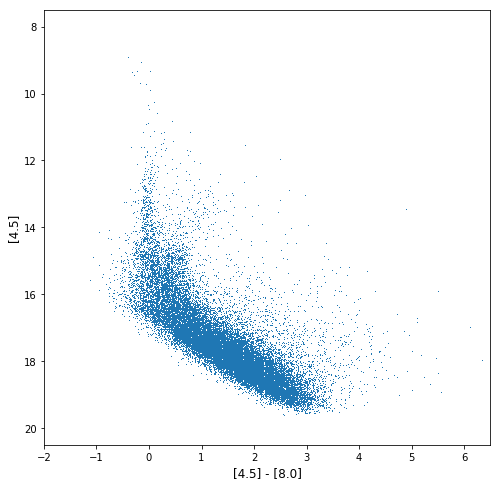

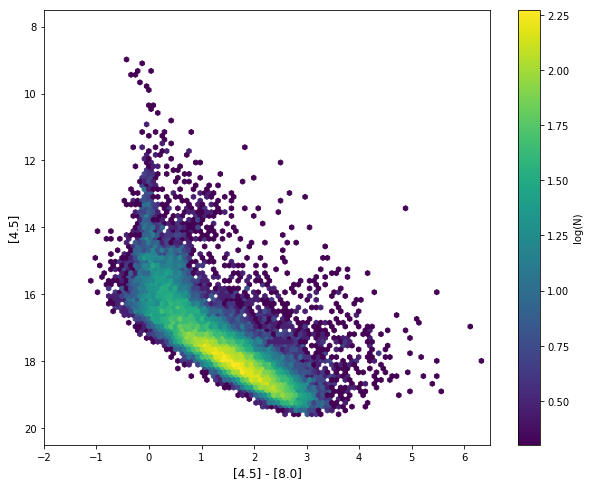

In [12]:
# [4.5] vs. [4.5]-[8.0]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.fourfiveMINUSeightzero,filter_phot_data.k45mag,',')
plt.xlim(-2.0, 6.5)
plt.ylim(20.5, 7.5)
plt.xlabel('[4.5] - [8.0]', size=12)
plt.ylabel('[4.5]', size=12)
#plt.savefig('[4.5]_vs_[4.5]-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.0, 6.5)
plt.ylim(20.5, 7.5)
im1 = ax1.hexbin(filter_phot_data.fourfiveMINUSeightzero, filter_phot_data.k45mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.0, 6.5, 20.5, 7.5))
ax1.set_xlabel('[4.5] - [8.0]', size=12)
ax1.set_ylabel('[4.5]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[4.5]_vs_[4.5]-[8.0]_hist.pdf')

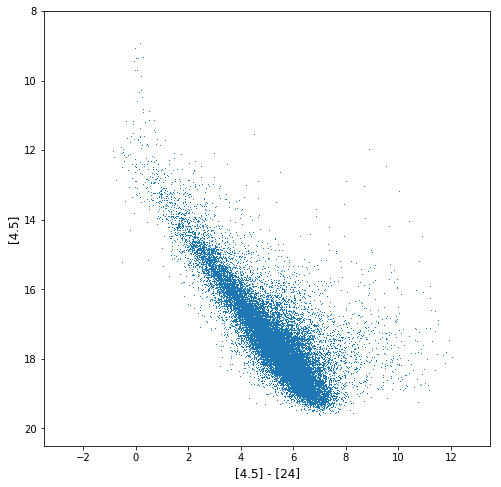

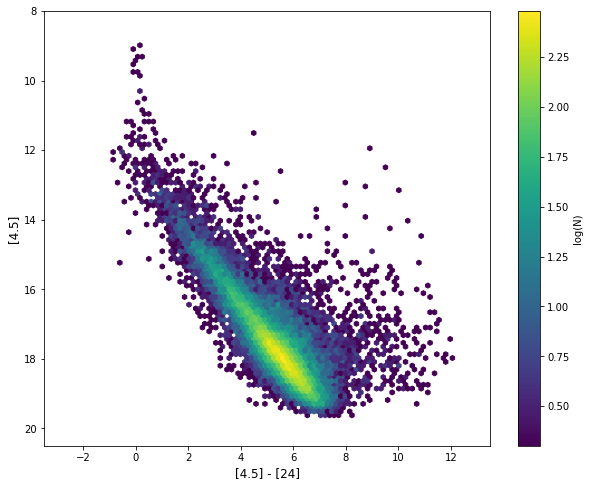

In [13]:
# [4.5] vs. [4.5]-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.fourfiveMINUStwentyfour,filter_phot_data.k45mag,',')
plt.xlim(-3.5, 13.5)
plt.ylim(20.5, 8.0)
plt.xlabel('[4.5] - [24]', size=12)
plt.ylabel('[4.5]', size=12)
#plt.savefig('[4.5]_vs_[4.5]-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.5, 13.5)
plt.ylim(20.5, 8.0)
im1 = ax1.hexbin(filter_phot_data.fourfiveMINUStwentyfour, filter_phot_data.k45mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.5, 13.5, 20.5, 8.0))
ax1.set_xlabel('[4.5] - [24]', size=12)
ax1.set_ylabel('[4.5]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[4.5]_vs_[4.5]-[24]_hist.pdf')

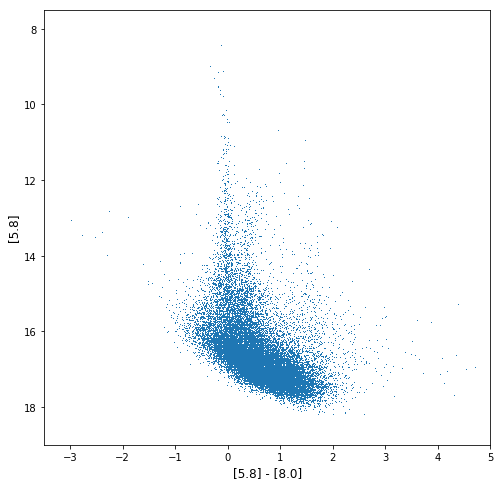

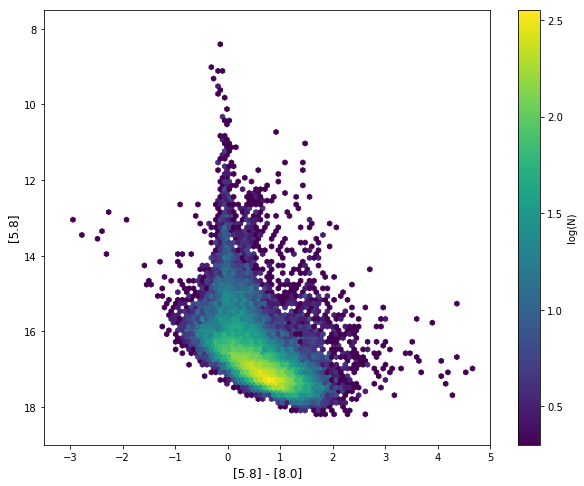

In [14]:
# [5.8] vs. [5.8]-[8.0]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.fiveeightMINUSeightzero,filter_phot_data.k58mag,',')
plt.xlim(-3.5, 5.0)
plt.ylim(19.0, 7.5)
plt.xlabel('[5.8] - [8.0]', size=12)
plt.ylabel('[5.8]', size=12)
#plt.savefig('[5.8]_vs_[5.8]-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.5, 5.0)
plt.ylim(19.0, 7.5)
im1 = ax1.hexbin(filter_phot_data.fiveeightMINUSeightzero, filter_phot_data.k58mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.5, 5.0, 19.0, 7.5))
ax1.set_xlabel('[5.8] - [8.0]', size=12)
ax1.set_ylabel('[5.8]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[5.8]_vs_[5.8]-[8.0]_hist.pdf')

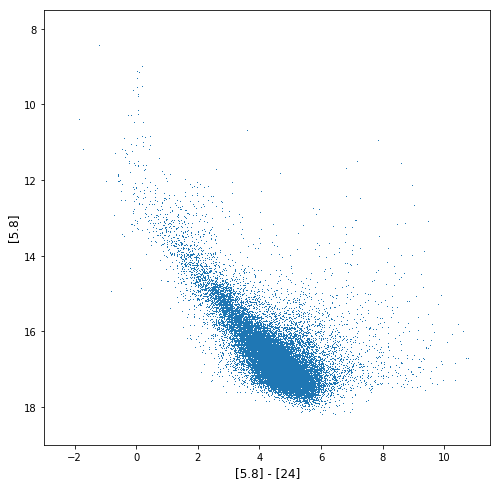

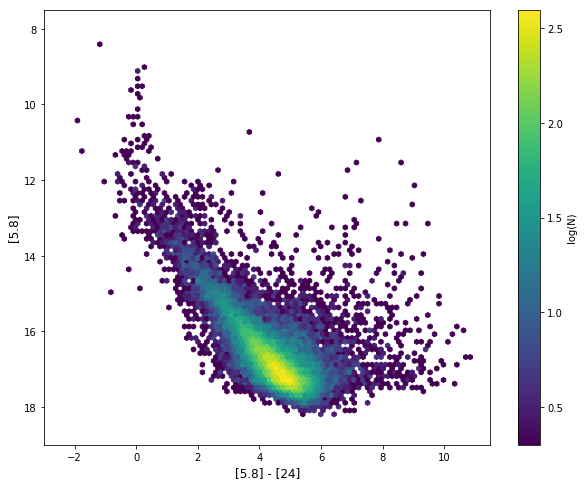

In [15]:
# [5.8] vs. [5.8]-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.fiveeightMINUStwentyfour,filter_phot_data.k58mag,',')
plt.xlim(-3.0, 11.5)
plt.ylim(19.0, 7.5)
plt.xlabel('[5.8] - [24]', size=12)
plt.ylabel('[5.8]', size=12)
#plt.savefig('[5.8]_vs_[5.8]-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.0, 11.5)
plt.ylim(19.0, 7.5)
im1 = ax1.hexbin(filter_phot_data.fiveeightMINUStwentyfour, filter_phot_data.k58mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.0, 11.5, 19.0, 7.5))
ax1.set_xlabel('[5.8] - [24]', size=12)
ax1.set_ylabel('[5.8]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[5.8]_vs_[5.8]-[24]_hist.pdf')

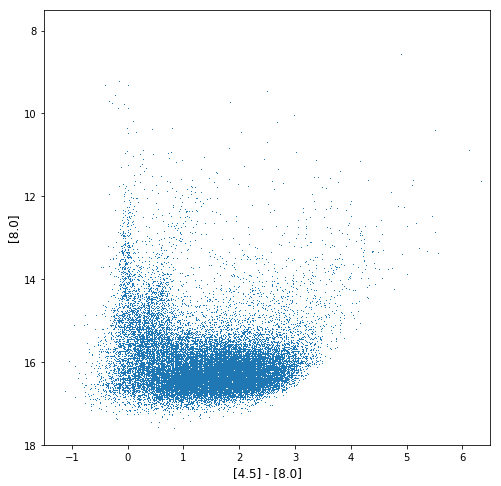

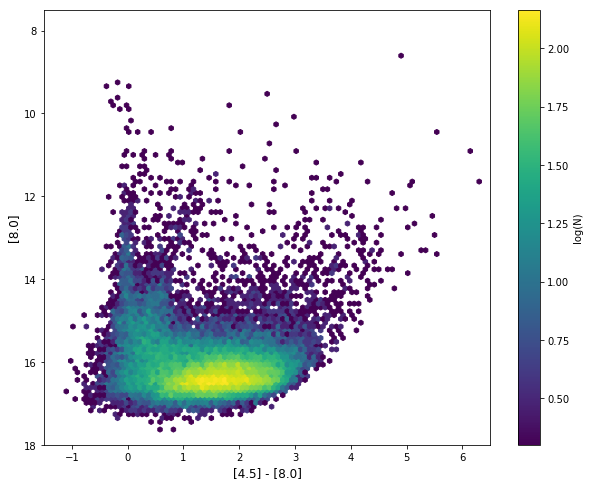

In [16]:
# [8.0] vs. [4.5]-[8.0]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.fourfiveMINUSeightzero,filter_phot_data.k80mag,',')
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 7.5)
plt.xlabel('[4.5] - [8.0]', size=12)
plt.ylabel('[8.0]', size=12)
#plt.savefig('[8.0]_vs_[4.5]-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 6.5)
plt.ylim(18.0, 7.5)
im1 = ax1.hexbin(filter_phot_data.fourfiveMINUSeightzero, filter_phot_data.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.5, 6.5, 18.0, 7.5))
ax1.set_xlabel('[4.5] - [8.0]', size=12)
ax1.set_ylabel('[8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[8.0]_vs_[4.5]-[8.0]_hist.pdf')

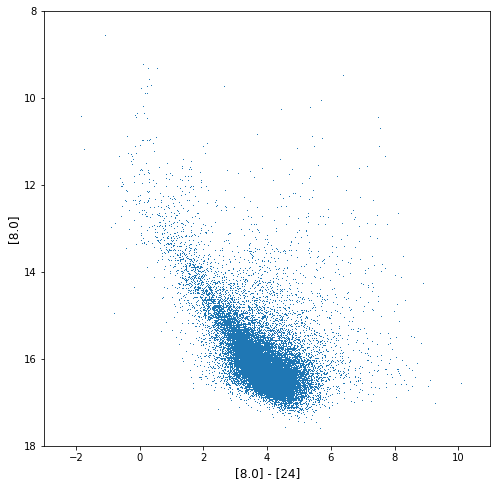

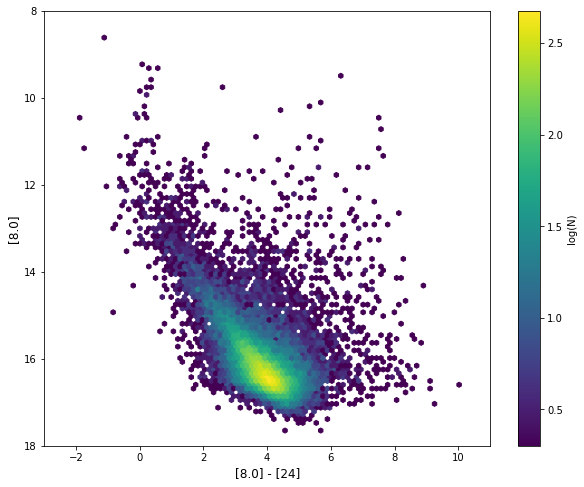

In [17]:
# [8.0] vs. [8.0]-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.eightzeroMINUStwentyfour,filter_phot_data.k80mag,',')
plt.xlim(-3.0, 11.0)
plt.ylim(18.0, 8.0)
plt.xlabel('[8.0] - [24]', size=12)
plt.ylabel('[8.0]', size=12)
#plt.savefig('[8.0]_vs_[8.0]-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.0, 11.0)
plt.ylim(18.0, 8.0)
im1 = ax1.hexbin(filter_phot_data.eightzeroMINUStwentyfour, filter_phot_data.k80mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.0, 11.0, 18.0, 8.0))
ax1.set_xlabel('[8.0] - [24]', size=12)
ax1.set_ylabel('[8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[8.0]_vs_[8.0]-[24]_hist.pdf')

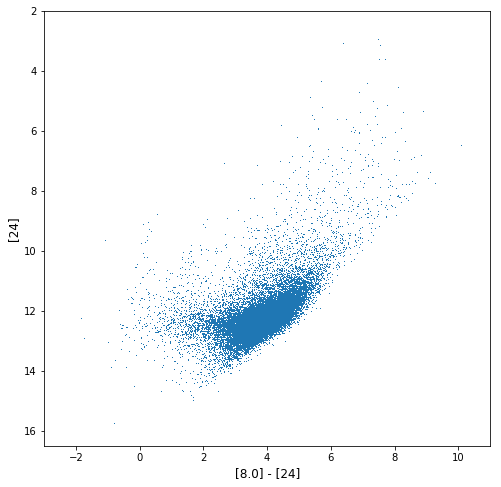

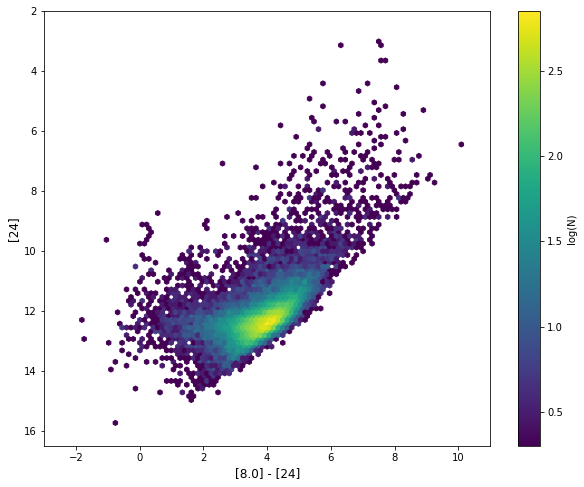

In [18]:
# [24] vs. [8.0]-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.eightzeroMINUStwentyfour,filter_phot_data.k24mag,',')
plt.xlim(-3.0, 11.0)
plt.ylim(16.5, 2.0)
plt.xlabel('[8.0] - [24]', size=12)
plt.ylabel('[24]', size=12)
#plt.savefig('[24]_vs_[8.0]-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.0, 11.0)
plt.ylim(16.5, 2.0)
im1 = ax1.hexbin(filter_phot_data.eightzeroMINUStwentyfour, filter_phot_data.k24mag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.0, 11.0, 16.5, 2.0))
ax1.set_xlabel('[8.0] - [24]', size=12)
ax1.set_ylabel('[24]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[24]_vs_[8.0]-[24]_hist.pdf')

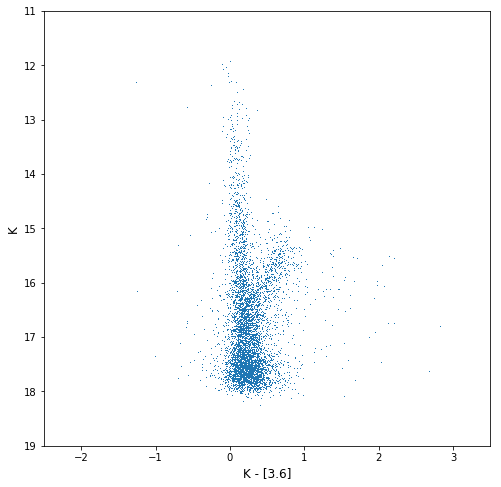

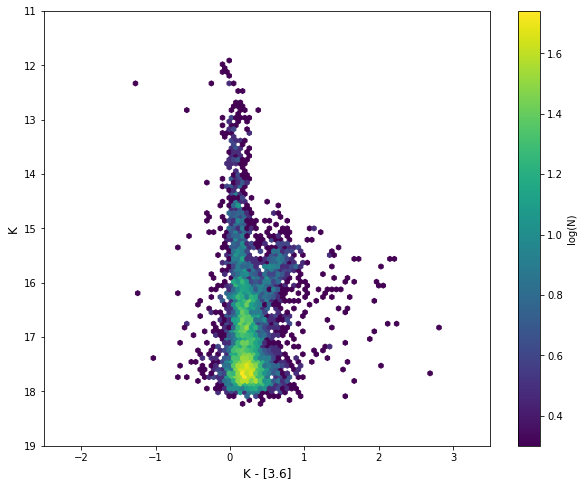

In [53]:
# K vs. K-[3.6]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.kMINUSthreesix,filter_phot_data.Kmag,',')
plt.xlim(-2.5, 3.5)
plt.ylim(19.0, 11.0)
plt.xlabel('K - [3.6]', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_K-[3.6]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.5, 3.5)
plt.ylim(19.0, 11.0)
im1 = ax1.hexbin(filter_phot_data.kMINUSthreesix, filter_phot_data.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.5, 3.5, 19.0, 11.0))
ax1.set_xlabel('K - [3.6]', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_K-[3.6]_hist.pdf')

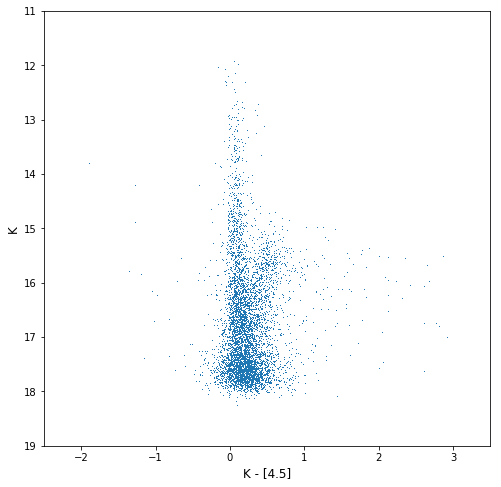

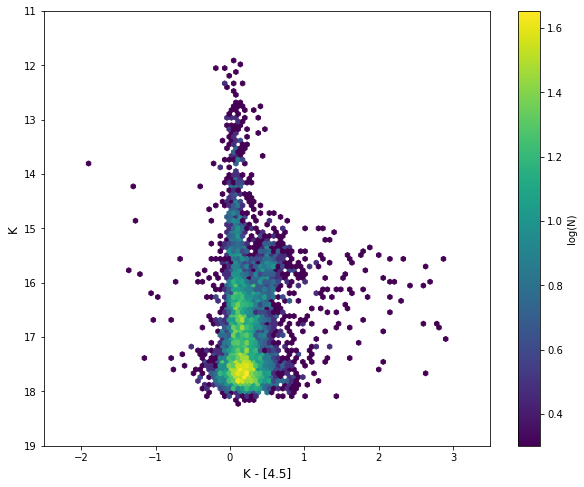

In [54]:
# K vs. K-[4.5]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.kMINUSfourfive,filter_phot_data.Kmag,',')
plt.xlim(-2.5, 3.5)
plt.ylim(19.0, 11.0)
plt.xlabel('K - [4.5]', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_K-[4.5]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.5, 3.5)
plt.ylim(19.0, 11.0)
im1 = ax1.hexbin(filter_phot_data.kMINUSfourfive, filter_phot_data.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.5, 3.5, 19.0, 11.0))
ax1.set_xlabel('K - [4.5]', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_K-[4.5]_hist.pdf')

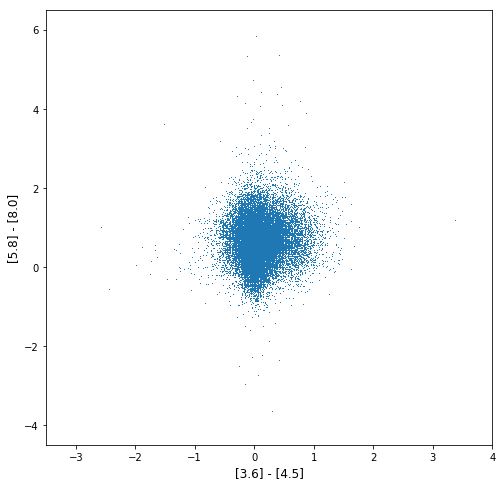

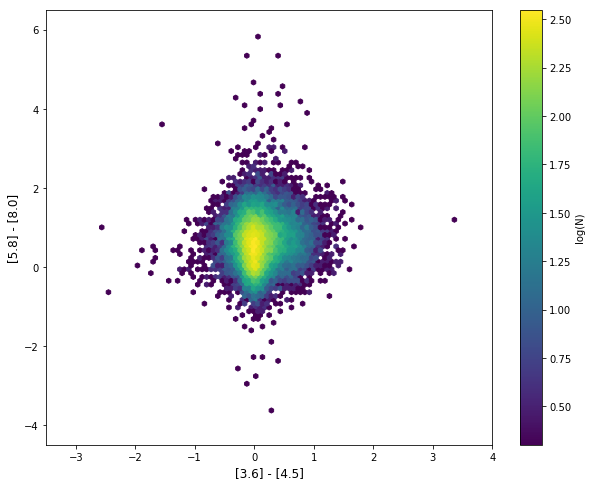

In [21]:
# [5.8]-[8.0] vs. [3.6]-[4.5]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.threesixMINUSfourfive, filter_phot_data.fiveeightMINUSeightzero,',')
plt.xlim(-3.5, 4.0)
plt.ylim(-4.5, 6.5)
plt.xlabel('[3.6] - [4.5]', size=12)
plt.ylabel('[5.8] - [8.0]', size=12)
#plt.savefig('[5.8]-[8.0]_vs_[3.6]-[4.5]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.5, 4.0)
plt.ylim(-4.5, 6.5)
im1 = ax1.hexbin(filter_phot_data.threesixMINUSfourfive, filter_phot_data.fiveeightMINUSeightzero, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.5, 4.0, -4.5, 6.5))
ax1.set_xlabel('[3.6] - [4.5]', size=12)
ax1.set_ylabel('[5.8] - [8.0]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[5.8]-[8.0]_vs_[3.6]-[4.5]_hist.pdf')

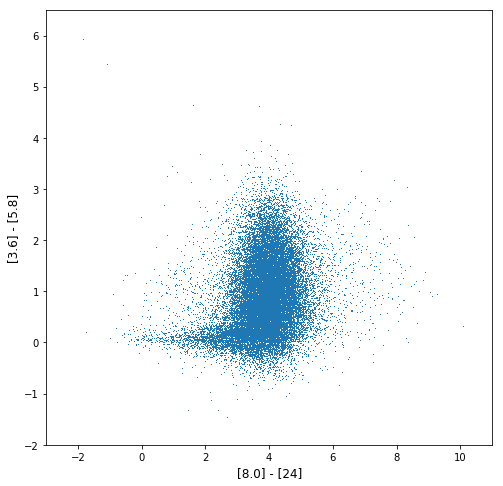

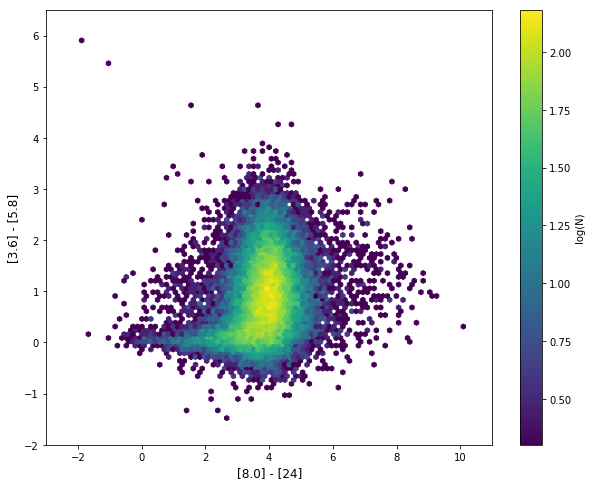

In [22]:
# [3.6]-[5.8] vs. [8.0]-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.eightzeroMINUStwentyfour, filter_phot_data.threesixMINUSfiveeight,',')
plt.xlim(-3.0, 11.0)
plt.ylim(-2.0, 6.5)
plt.xlabel('[8.0] - [24]', size=12)
plt.ylabel('[3.6] - [5.8]', size=12)
#plt.savefig('[3.6]-[5.8]_vs_[8.0]-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-3.0, 11.0)
plt.ylim(-2.0, 6.5)
im1 = ax1.hexbin(filter_phot_data.eightzeroMINUStwentyfour, filter_phot_data.threesixMINUSfiveeight, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-3.0, 11.0, -2.0, 6.5))
ax1.set_xlabel('[8.0] - [24]', size=12)
ax1.set_ylabel('[3.6] - [5.8]', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('[3.6]-[5.8]_vs_[8.0]-[24]_hist.pdf')

In [23]:
# (2) Here are the plots from CMD_21May2018.ipynb

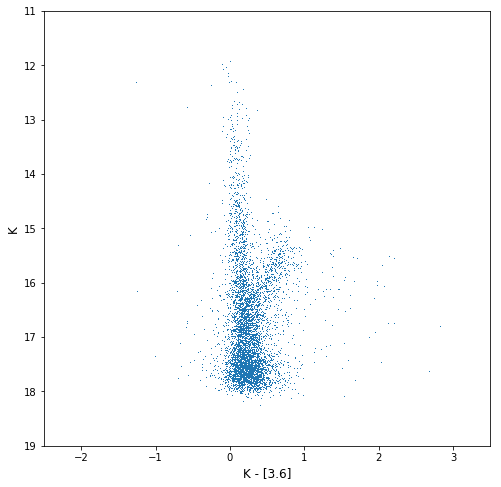

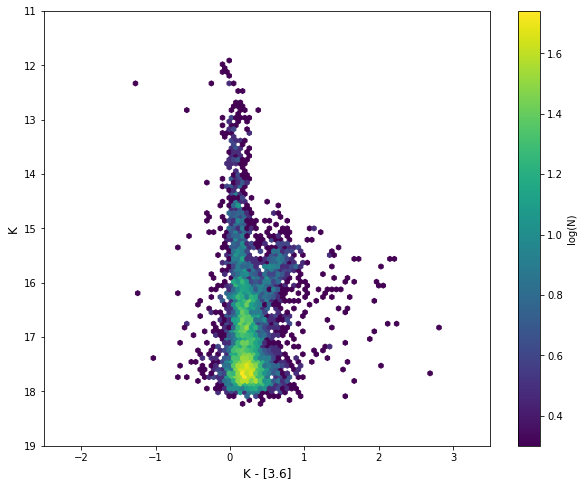

In [55]:
# K vs. K-[3.6]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.kMINUSthreesix,filter_phot_data.Kmag,',')
plt.xlim(-2.5, 3.5)
plt.ylim(19.0, 11.0)
plt.xlabel('K - [3.6]', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_K-[3.6]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.5, 3.5)
plt.ylim(19.0, 11.0)
im1 = ax1.hexbin(filter_phot_data.kMINUSthreesix, filter_phot_data.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.5, 3.5, 19.0, 11.0))
ax1.set_xlabel('K - [3.6]', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_K-[3.6]_hist.pdf')

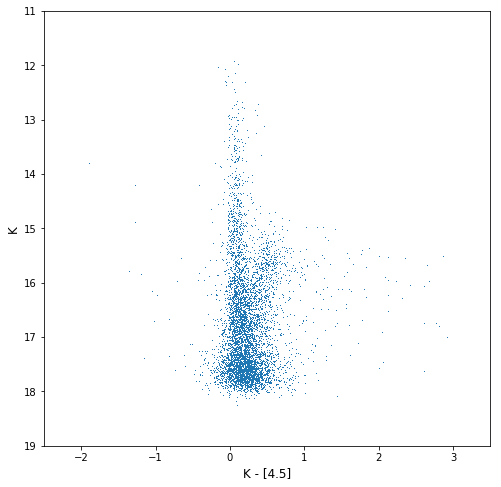

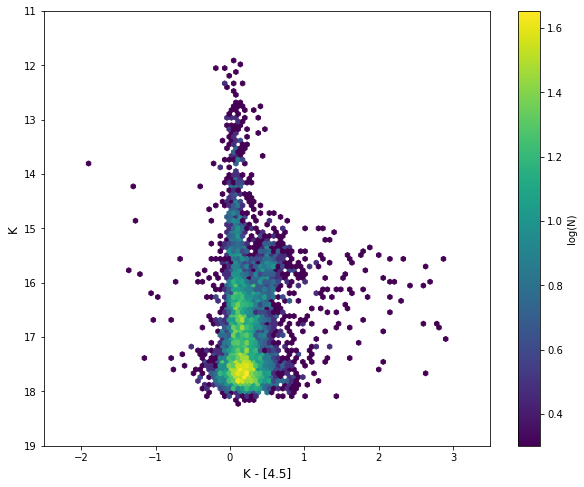

In [56]:
# K vs. K-[4.5]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.kMINUSfourfive,filter_phot_data.Kmag,',')
plt.xlim(-2.5, 3.5)
plt.ylim(19.0, 11.0)
plt.xlabel('K - [4.5]', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_K-[4.5]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.5, 3.5)
plt.ylim(19.0, 11.0)
im1 = ax1.hexbin(filter_phot_data.kMINUSfourfive, filter_phot_data.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.5, 3.5, 19.0, 11.0))
ax1.set_xlabel('K - [4.5]', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_K-[4.5]_hist.pdf')

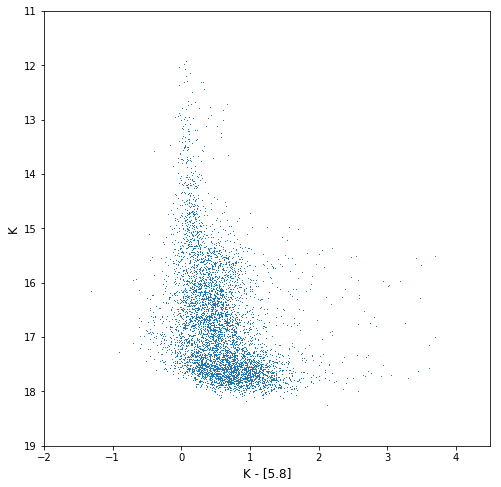

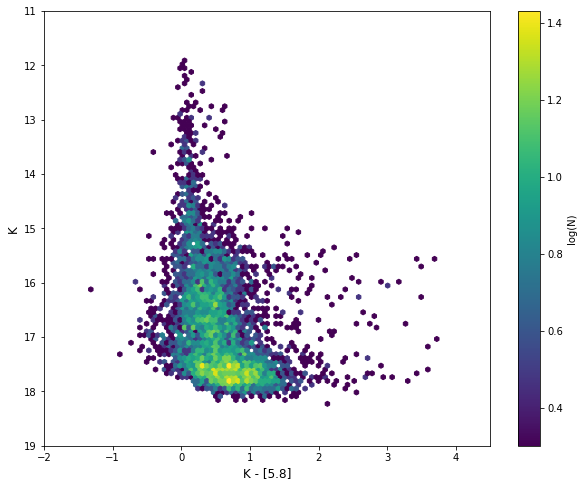

In [58]:
# K vs. K-[5.8]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.kMINUSfiveeight,filter_phot_data.Kmag,',')
plt.xlim(-2.0, 4.5)
plt.ylim(19.0, 11.0)
plt.xlabel('K - [5.8]', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_K-[5.8]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.0, 4.5)
plt.ylim(19.0, 11.0)
im1 = ax1.hexbin(filter_phot_data.kMINUSfiveeight, filter_phot_data.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.0, 4.5, 19.0, 11.0))
ax1.set_xlabel('K - [5.8]', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_K-[5.8]_hist.pdf')

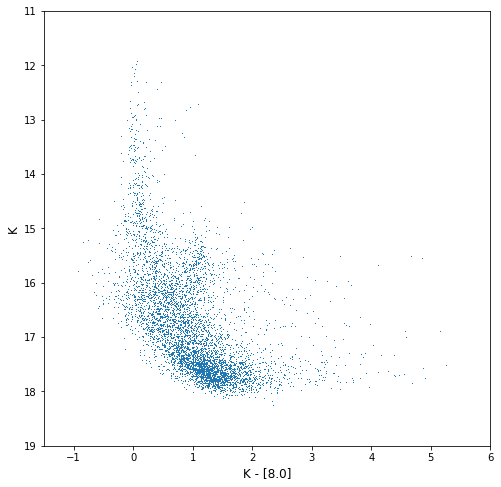

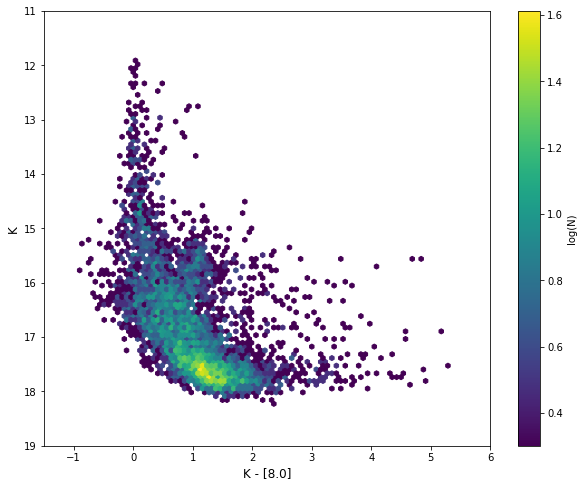

In [61]:
# K vs. K-[8.0]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.kMINUSeightzero,filter_phot_data.Kmag,',')
plt.xlim(-1.5, 6.0)
plt.ylim(19.0, 11.0)
plt.xlabel('K - [8.0]', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_K-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 6.0)
plt.ylim(19.0, 11.0)
im1 = ax1.hexbin(filter_phot_data.kMINUSeightzero, filter_phot_data.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.5, 6.0, 19.0, 11.0))
ax1.set_xlabel('K - [8.0]', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_K-[8.0]_hist.pdf')

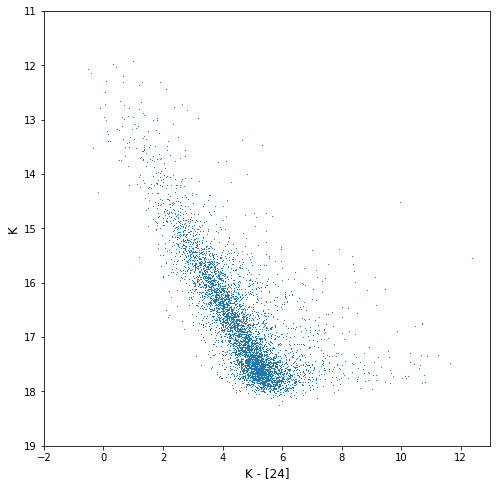

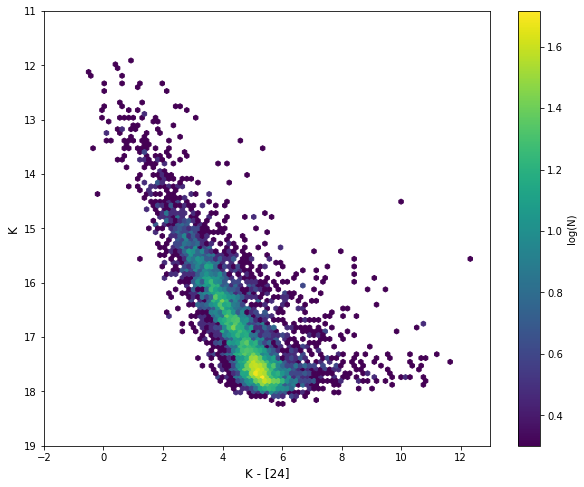

In [64]:
# K vs. K-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.kMINUStwentyfour,filter_phot_data.Kmag,',')
plt.xlim(-2.0, 13.0)
plt.ylim(19.0, 11.0)
plt.xlabel('K - [24]', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_K-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.0, 13.0)
plt.ylim(19.0, 11.0)
im1 = ax1.hexbin(filter_phot_data.kMINUStwentyfour, filter_phot_data.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.0, 13.0, 19.0, 11.0))
ax1.set_xlabel('K - [24]', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_K-[24]_hist.pdf')

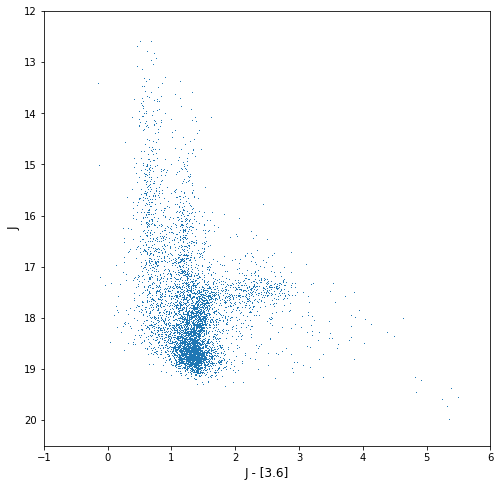

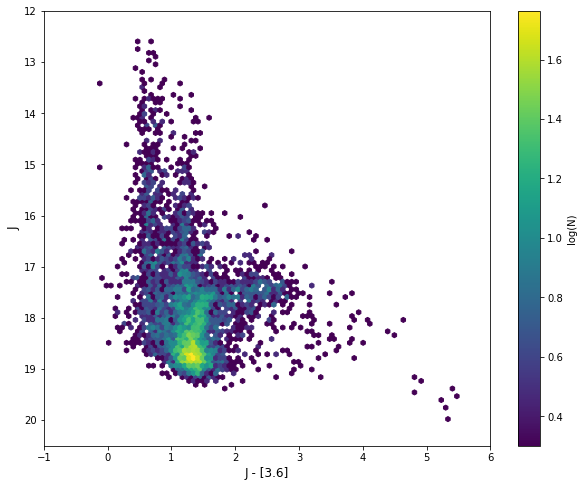

In [70]:
# J vs. J-[3.6]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSthreesix,filter_phot_data.Jmag,',')
plt.xlim(-1.0, 6.0)
plt.ylim(20.5, 12.0)
plt.xlabel('J - [3.6]', size=12)
plt.ylabel('J', size=12)
#plt.savefig('J_vs_J-[3.6]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.0, 6.0)
plt.ylim(20.5, 12.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSthreesix, filter_phot_data.Jmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.0, 6.0, 20.5, 12.0))
ax1.set_xlabel('J - [3.6]', size=12)
ax1.set_ylabel('J', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('J_vs_J-[3.6]_hist.pdf')

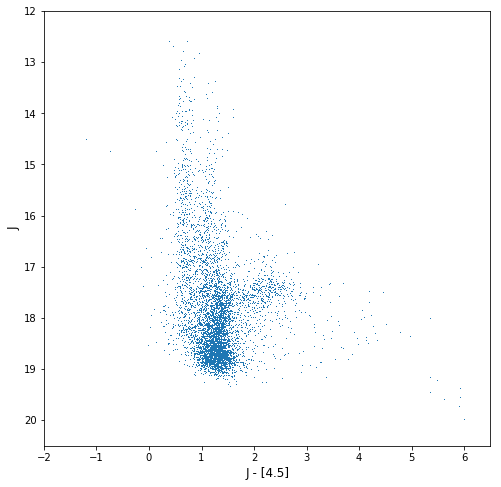

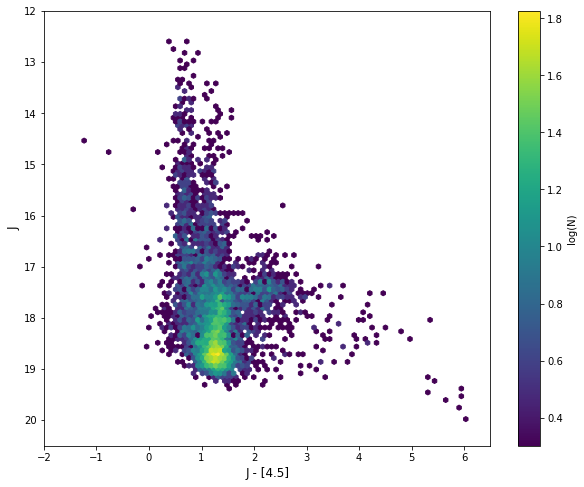

In [74]:
# J vs. J-[4.5]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSfourfive,filter_phot_data.Jmag,',')
plt.xlim(-2.0, 6.5)
plt.ylim(20.5, 12.0)
plt.xlabel('J - [4.5]', size=12)
plt.ylabel('J', size=12)
#plt.savefig('J_vs_J-[4.5]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.0, 6.5)
plt.ylim(20.5, 12.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSfourfive, filter_phot_data.Jmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.0, 6.5, 20.5, 12.0))
ax1.set_xlabel('J - [4.5]', size=12)
ax1.set_ylabel('J', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('J_vs_J-[4.5]_hist.pdf')

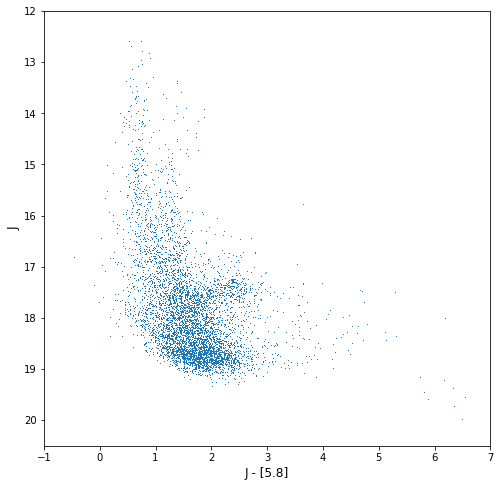

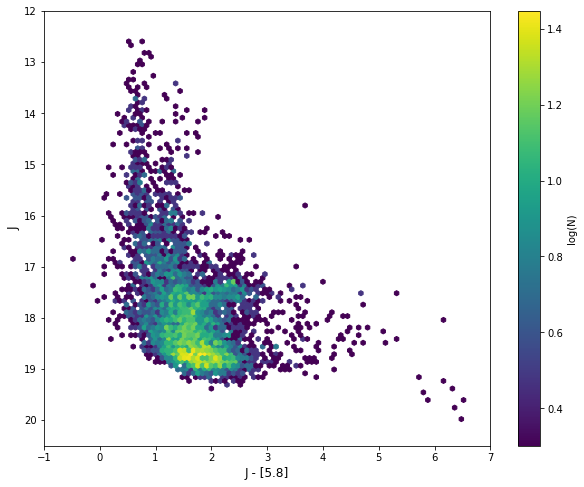

In [76]:
# J vs. J-[5.8]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSfiveeight,filter_phot_data.Jmag,',')
plt.xlim(-1.0, 7.0)
plt.ylim(20.5, 12.0)
plt.xlabel('J - [5.8]', size=12)
plt.ylabel('J', size=12)
#plt.savefig('J_vs_J-[5.8]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.0, 7.0)
plt.ylim(20.5, 12.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSfiveeight, filter_phot_data.Jmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.0, 7.0, 20.5, 12.0))
ax1.set_xlabel('J - [5.8]', size=12)
ax1.set_ylabel('J', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('J_vs_J-[5.8]_hist.pdf')

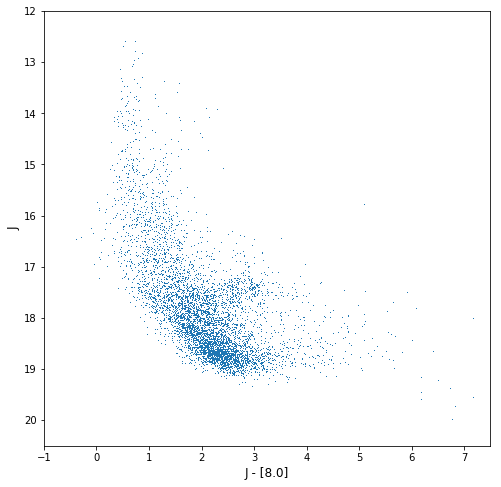

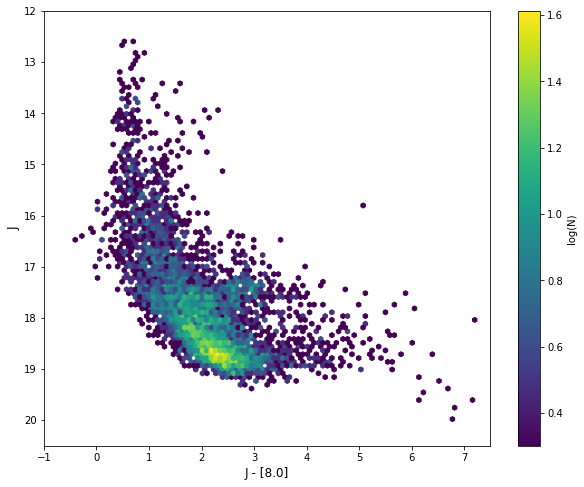

In [78]:
# J vs. J-[8.0]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSeightzero,filter_phot_data.Jmag,',')
plt.xlim(-1.0, 7.5)
plt.ylim(20.5, 12.0)
plt.xlabel('J - [8.0]', size=12)
plt.ylabel('J', size=12)
#plt.savefig('J_vs_J-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.0, 7.5)
plt.ylim(20.5, 12.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSeightzero, filter_phot_data.Jmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.0, 7.5, 20.5, 12.0))
ax1.set_xlabel('J - [8.0]', size=12)
ax1.set_ylabel('J', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('J_vs_J-[8.0]_hist.pdf')

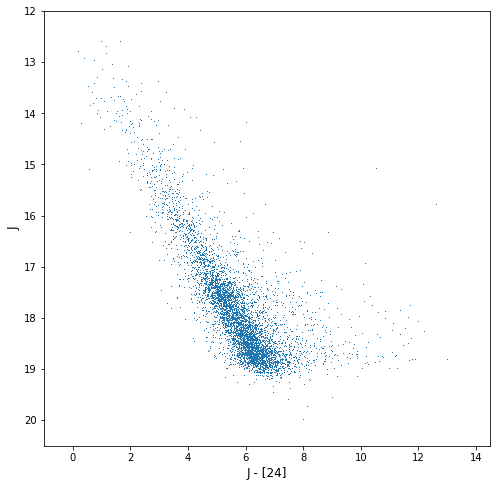

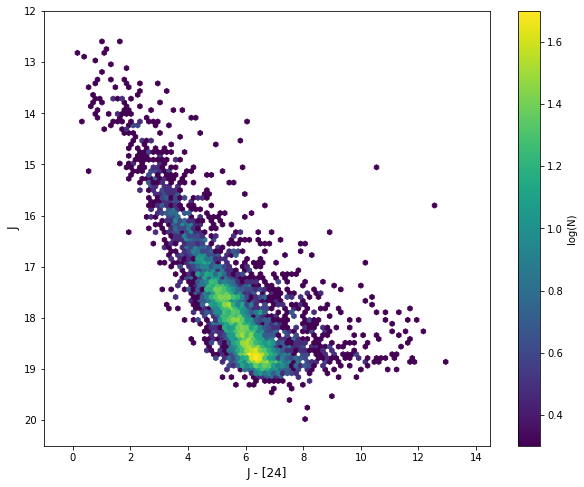

In [80]:
# J vs. J-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUStwentyfour,filter_phot_data.Jmag,',')
plt.xlim(-1.0, 14.5)
plt.ylim(20.5, 12.0)
plt.xlabel('J - [24]', size=12)
plt.ylabel('J', size=12)
#plt.savefig('J_vs_J-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.0, 14.5)
plt.ylim(20.5, 12.0)
im1 = ax1.hexbin(filter_phot_data.jMINUStwentyfour, filter_phot_data.Jmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.0, 14.5, 20.5, 12.0))
ax1.set_xlabel('J - [24]', size=12)
ax1.set_ylabel('J', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('J_vs_J-[24]_hist.pdf')

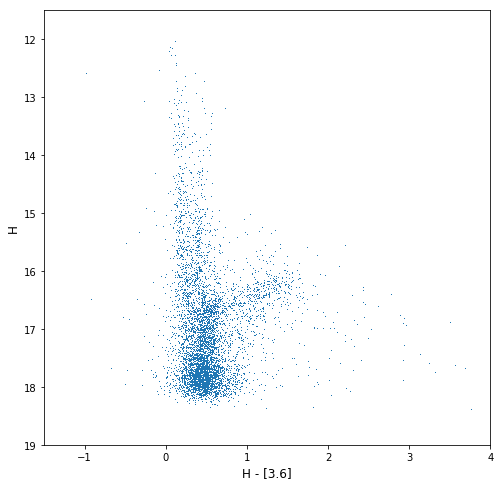

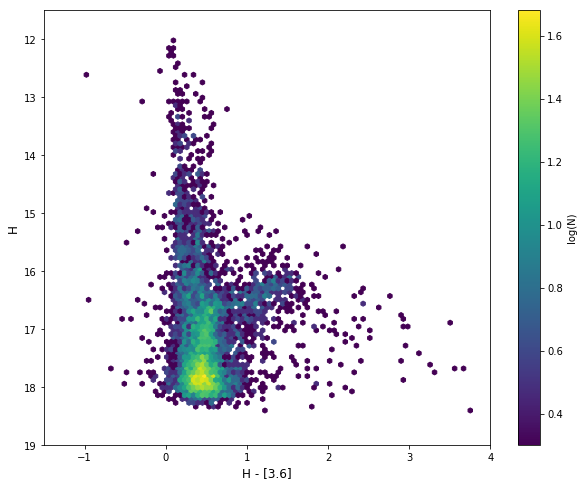

In [87]:
# H vs. H-[3.6]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.hMINUSthreesix,filter_phot_data.Hmag,',')
plt.xlim(-1.5, 4.0)
plt.ylim(19.0, 11.5)
plt.xlabel('H - [3.6]', size=12)
plt.ylabel('H', size=12)
#plt.savefig('H_vs_H-[3.6]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 4.0)
plt.ylim(19.0, 11.5)
im1 = ax1.hexbin(filter_phot_data.hMINUSthreesix, filter_phot_data.Hmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.5, 4.0, 19.0, 11.5))
ax1.set_xlabel('H - [3.6]', size=12)
ax1.set_ylabel('H', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('H_vs_H-[3.6]_hist.pdf')

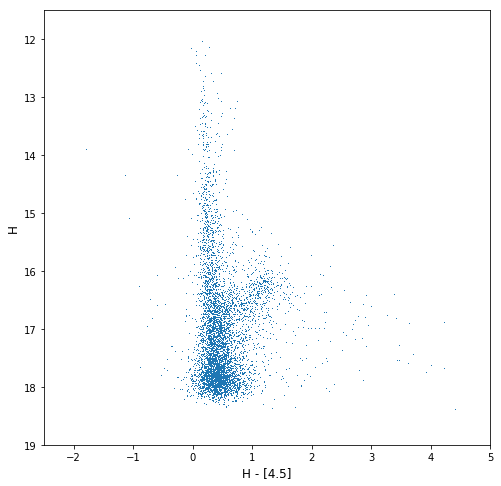

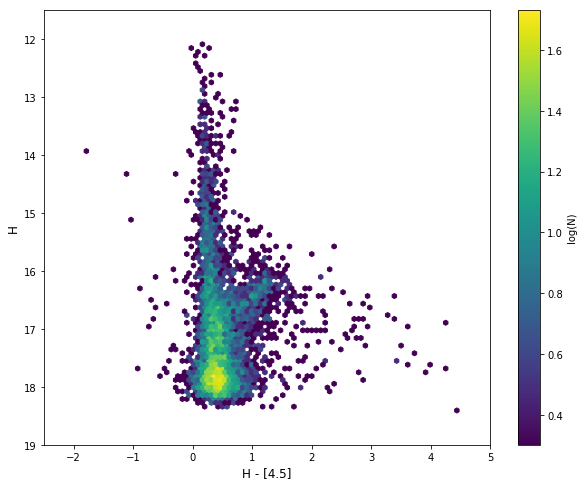

In [89]:
# H vs. H-[4.5]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.hMINUSfourfive,filter_phot_data.Hmag,',')
plt.xlim(-2.5, 5.0)
plt.ylim(19.0, 11.5)
plt.xlabel('H - [4.5]', size=12)
plt.ylabel('H', size=12)
#plt.savefig('H_vs_H-[4.5]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.5, 5.0)
plt.ylim(19.0, 11.5)
im1 = ax1.hexbin(filter_phot_data.hMINUSfourfive, filter_phot_data.Hmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.5, 5.0, 19.0, 11.5))
ax1.set_xlabel('H - [4.5]', size=12)
ax1.set_ylabel('H', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('H_vs_H-[4.5]_hist.pdf')

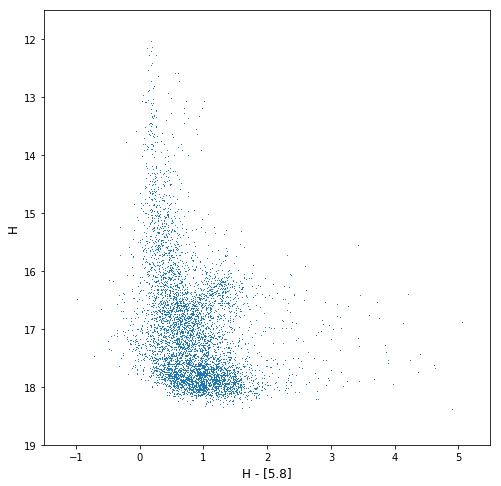

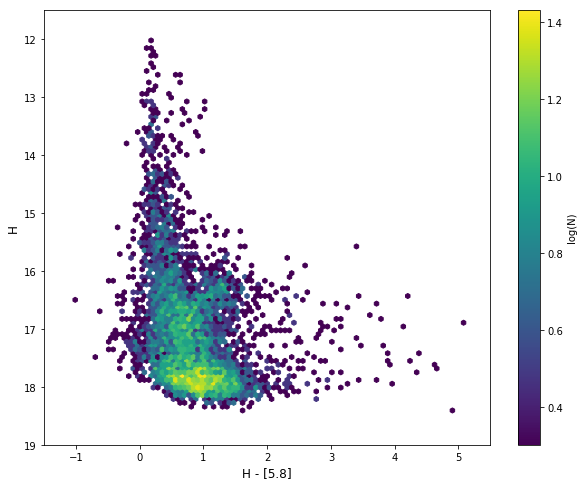

In [91]:
# H vs. H-[5.8]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.hMINUSfiveeight,filter_phot_data.Hmag,',')
plt.xlim(-1.5, 5.5)
plt.ylim(19.0, 11.5)
plt.xlabel('H - [5.8]', size=12)
plt.ylabel('H', size=12)
#plt.savefig('H_vs_H-[5.8]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 5.5)
plt.ylim(19.0, 11.5)
im1 = ax1.hexbin(filter_phot_data.hMINUSfiveeight, filter_phot_data.Hmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.5, 5.5, 19.0, 11.5))
ax1.set_xlabel('H - [5.8]', size=12)
ax1.set_ylabel('H', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('H_vs_H-[5.8]_hist.pdf')

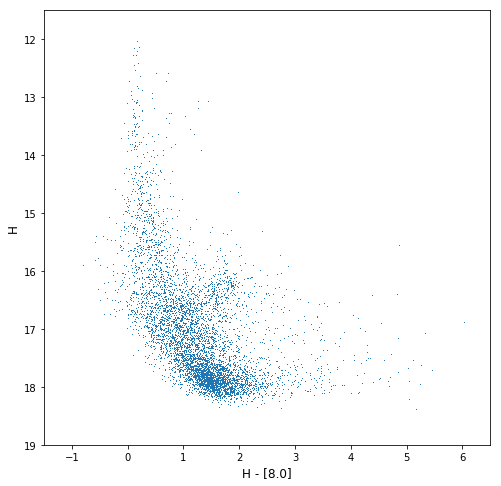

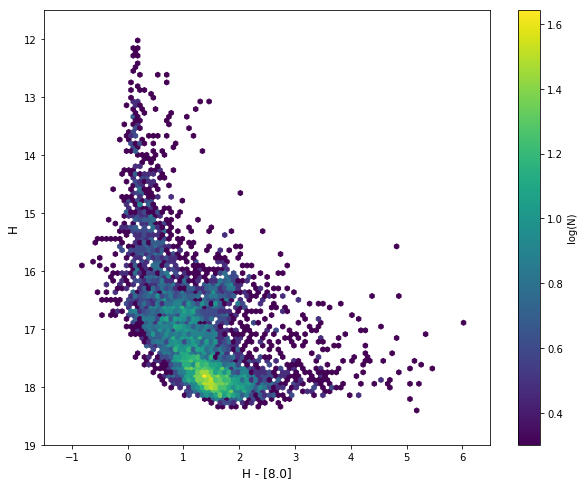

In [92]:
# H vs. H-[8.0]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.hMINUSeightzero,filter_phot_data.Hmag,',')
plt.xlim(-1.5, 6.5)
plt.ylim(19.0, 11.5)
plt.xlabel('H - [8.0]', size=12)
plt.ylabel('H', size=12)
#plt.savefig('H_vs_H-[8.0]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 6.5)
plt.ylim(19.0, 11.5)
im1 = ax1.hexbin(filter_phot_data.hMINUSeightzero, filter_phot_data.Hmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.5, 6.5, 19.0, 11.5))
ax1.set_xlabel('H - [8.0]', size=12)
ax1.set_ylabel('H', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('H_vs_H-[8.0]_hist.pdf')

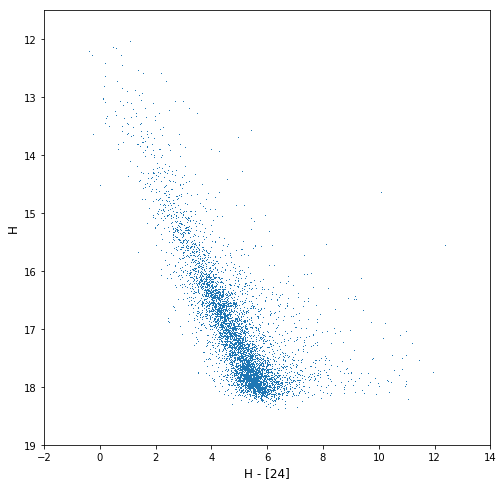

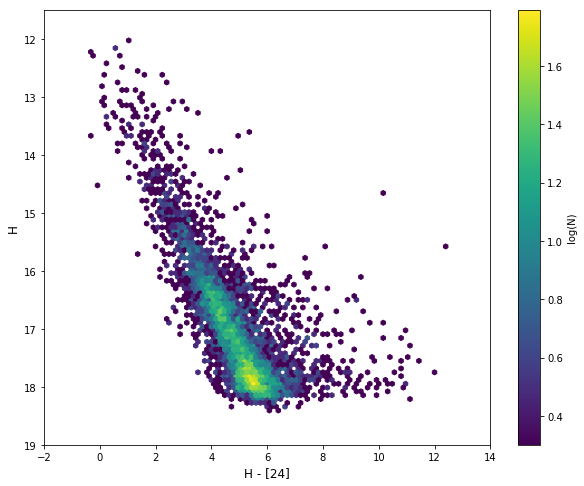

In [94]:
# H vs. H-[24]
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.hMINUStwentyfour,filter_phot_data.Hmag,',')
plt.xlim(-2.0, 14.0)
plt.ylim(19.0, 11.5)
plt.xlabel('H - [24]', size=12)
plt.ylabel('H', size=12)
#plt.savefig('H_vs_H-[24]_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-2.0, 14.0)
plt.ylim(19.0, 11.5)
im1 = ax1.hexbin(filter_phot_data.hMINUStwentyfour, filter_phot_data.Hmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-2.0, 14.0, 19.0, 11.5))
ax1.set_xlabel('H - [24]', size=12)
ax1.set_ylabel('H', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('H_vs_H-[24]_hist.pdf')

In [39]:
# (3) Here are the plots from CMD_29May2018.ipynb

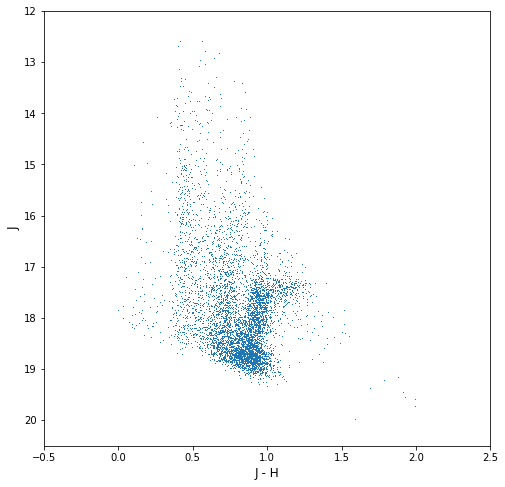

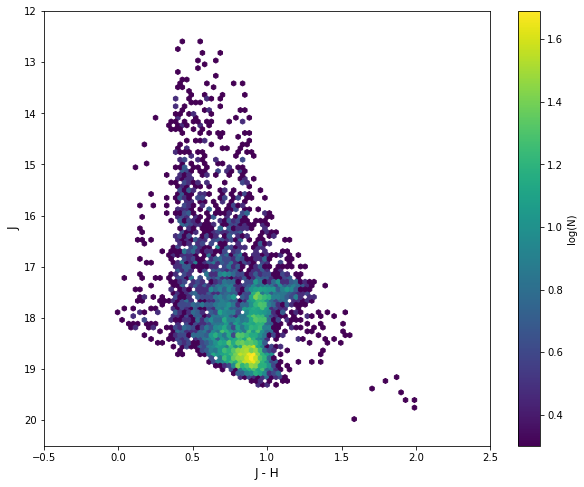

In [95]:
# J vs. J - H
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSh,filter_phot_data.Jmag,',')
plt.xlim(-0.5, 2.5)
plt.ylim(20.5, 12.0)
plt.xlabel('J - H', size=12)
plt.ylabel('J', size=12)
#plt.savefig('J_vs_J-H_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 2.5)
plt.ylim(20.5, 12.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSh, filter_phot_data.Jmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 2.5, 20.5, 12.0))
ax1.set_xlabel('J - H', size=12)
ax1.set_ylabel('J', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('J_vs_J-H_hist.pdf')

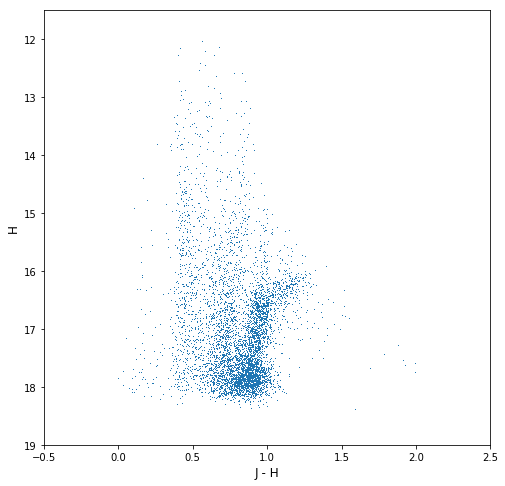

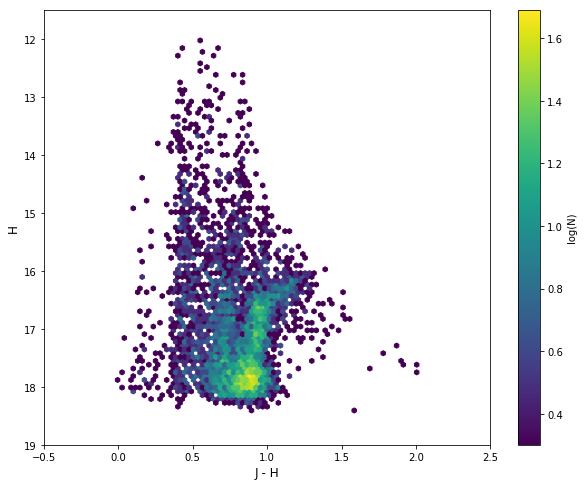

In [96]:
# H vs. J - H
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSh,filter_phot_data.Hmag,',')
plt.xlim(-0.5, 2.5)
plt.ylim(19.0, 11.5)
plt.xlabel('J - H', size=12)
plt.ylabel('H', size=12)
#plt.savefig('H_vs_J-H_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 2.5)
plt.ylim(19.0, 11.5)
im1 = ax1.hexbin(filter_phot_data.jMINUSh, filter_phot_data.Hmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 2.5, 19.0, 11.5))
ax1.set_xlabel('J - H', size=12)
ax1.set_ylabel('H', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('H_vs_J-H_hist.pdf')

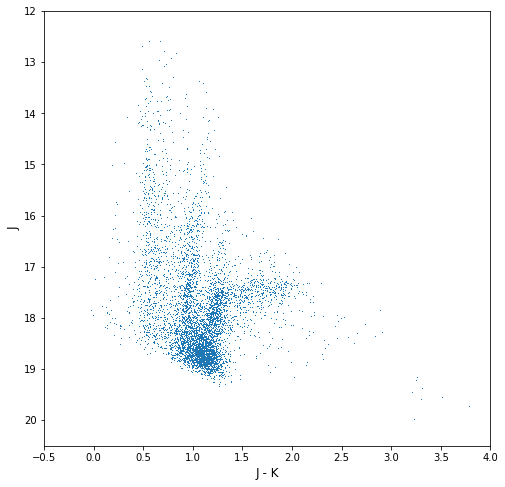

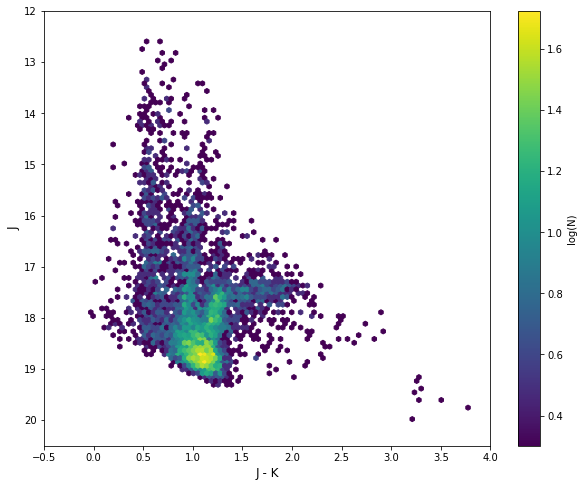

In [101]:
# J vs. J - K
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSk,filter_phot_data.Jmag,',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.5, 12.0)
plt.xlabel('J - K', size=12)
plt.ylabel('J', size=12)
#plt.savefig('J_vs_J-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 4.0)
plt.ylim(20.5, 12.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSk, filter_phot_data.Jmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 4.0, 20.5, 12.0))
ax1.set_xlabel('J - K', size=12)
ax1.set_ylabel('J', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('J_vs_J-K_hist.pdf')

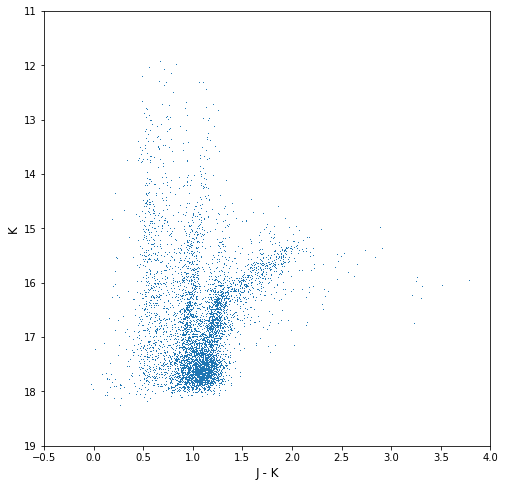

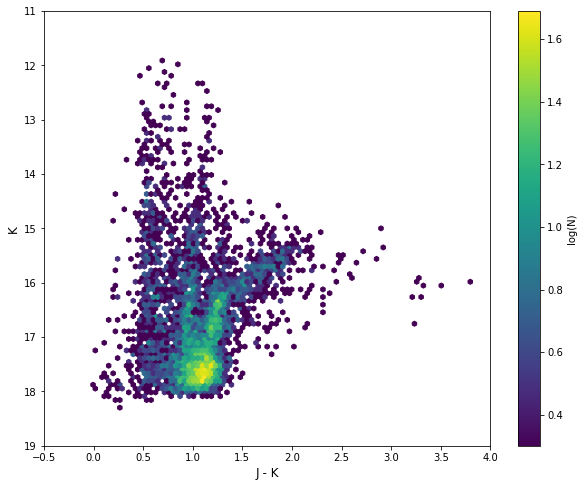

In [102]:
# K vs. J - K
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSk,filter_phot_data.Kmag,',')
plt.xlim(-0.5, 4.0)
plt.ylim(19.0, 11.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_J-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 4.0)
plt.ylim(19.0, 11.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSk, filter_phot_data.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 4.0, 19.0, 11.0))
ax1.set_xlabel('J - K', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_J-K_hist.pdf')

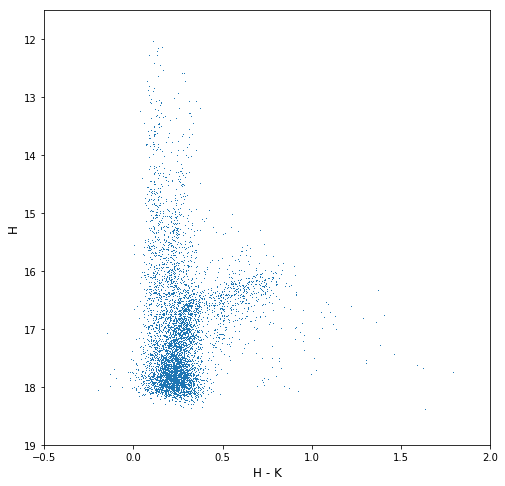

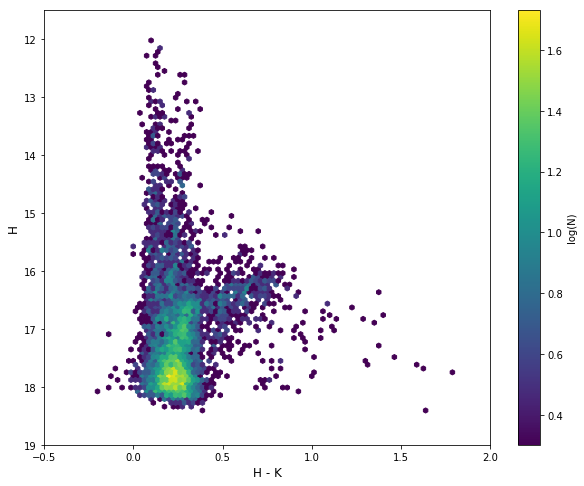

In [104]:
# H vs. H - K
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.hMINUSk,filter_phot_data.Hmag,',')
plt.xlim(-0.5, 2.0)
plt.ylim(19.0, 11.5)
plt.xlabel('H - K', size=12)
plt.ylabel('H', size=12)
#plt.savefig('H_vs_H-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 2.0)
plt.ylim(19.0, 11.5)
im1 = ax1.hexbin(filter_phot_data.hMINUSk, filter_phot_data.Hmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 2.0, 19.0, 11.5))
ax1.set_xlabel('H - K', size=12)
ax1.set_ylabel('H', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('H_vs_H-K_hist.pdf')

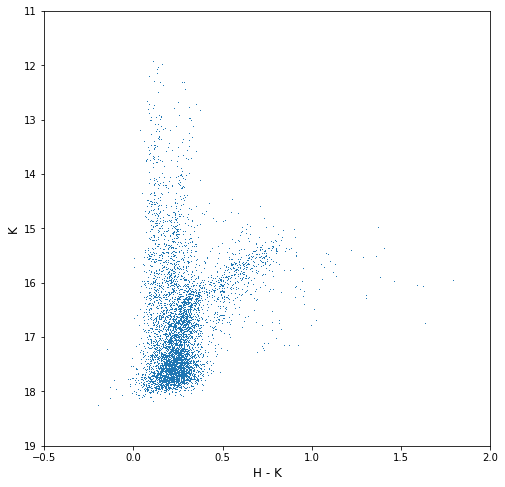

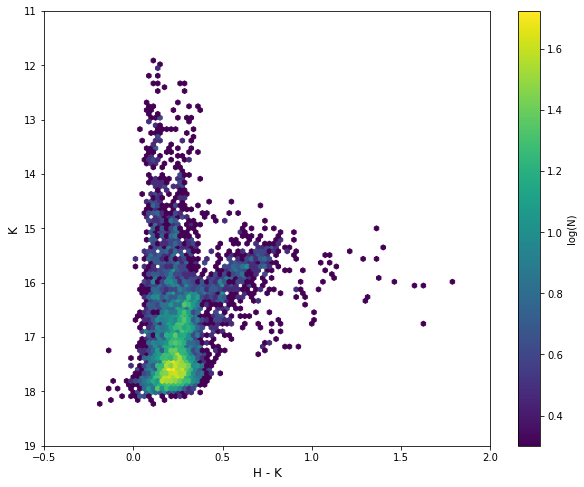

In [105]:
# K vs. H - K
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.hMINUSk,filter_phot_data.Kmag,',')
plt.xlim(-0.5, 2.0)
plt.ylim(19.0, 11.0)
plt.xlabel('H - K', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_H-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 2.0)
plt.ylim(19.0, 11.0)
im1 = ax1.hexbin(filter_phot_data.hMINUSk, filter_phot_data.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 2.0, 19.0, 11.0))
ax1.set_xlabel('H - K', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_H-K_hist.pdf')

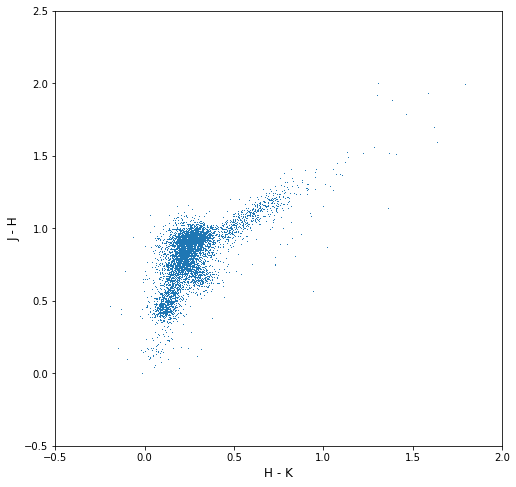

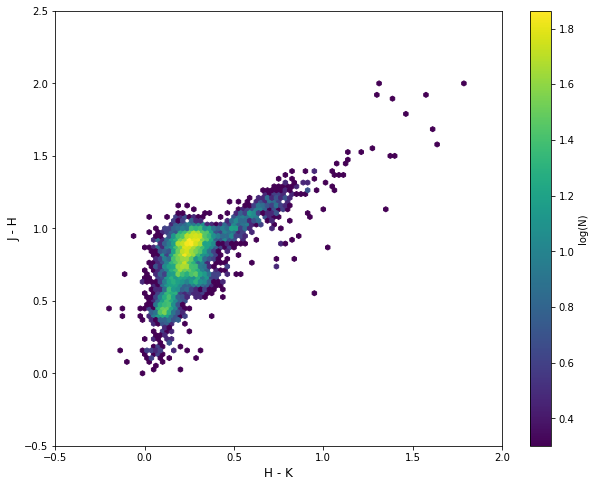

In [106]:
# J - H vs. H - K
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.hMINUSk,filter_phot_data.jMINUSh,',')
plt.xlim(-0.5, 2.0)
plt.ylim(-0.5, 2.5)
plt.xlabel('H - K', size=12)
plt.ylabel('J - H', size=12)
#plt.savefig('J-H_vs_H-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 2.0)
plt.ylim(-0.5, 2.5)
im1 = ax1.hexbin(filter_phot_data.hMINUSk, filter_phot_data.jMINUSh, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 2.0, -0.5, 2.5))
ax1.set_xlabel('H - K', size=12)
ax1.set_ylabel('J - H', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('J-H_vs_H-K_hist.pdf')

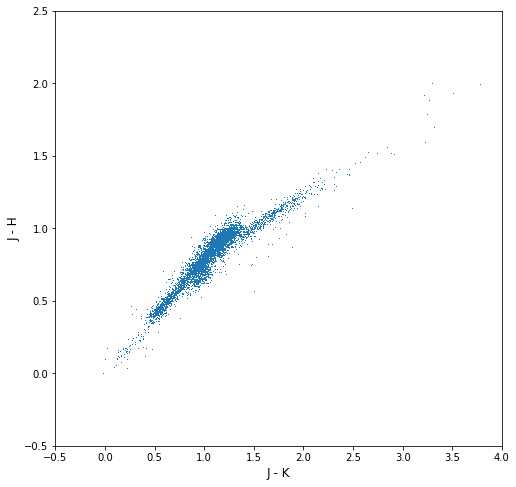

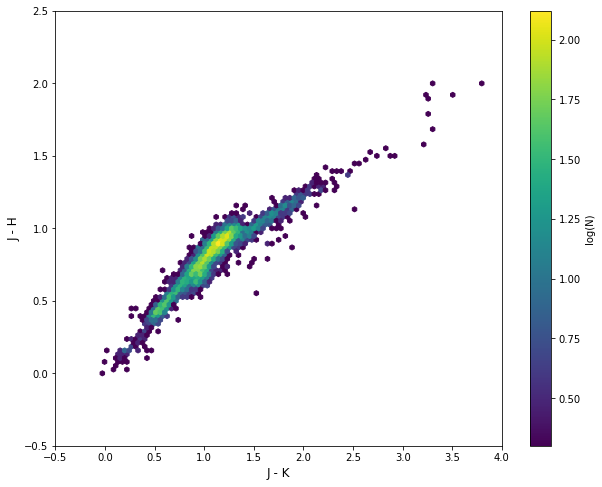

In [107]:
# J - H vs. J - K
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSk,filter_phot_data.jMINUSh,',')
plt.xlim(-0.5, 4.0)
plt.ylim(-0.5, 2.5)
plt.xlabel('J - K', size=12)
plt.ylabel('J - H', size=12)
#plt.savefig('J-H_vs_J-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 4.0)
plt.ylim(-0.5, 2.5)
im1 = ax1.hexbin(filter_phot_data.jMINUSk, filter_phot_data.jMINUSh, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 4.0, -0.5, 2.5))
ax1.set_xlabel('J - K', size=12)
ax1.set_ylabel('J - H', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('J-H_vs_J-K_hist.pdf')

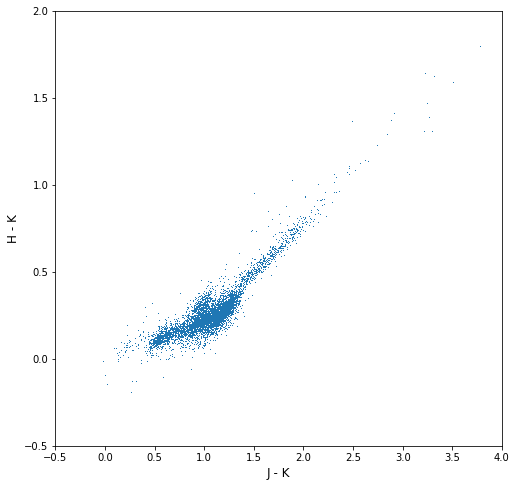

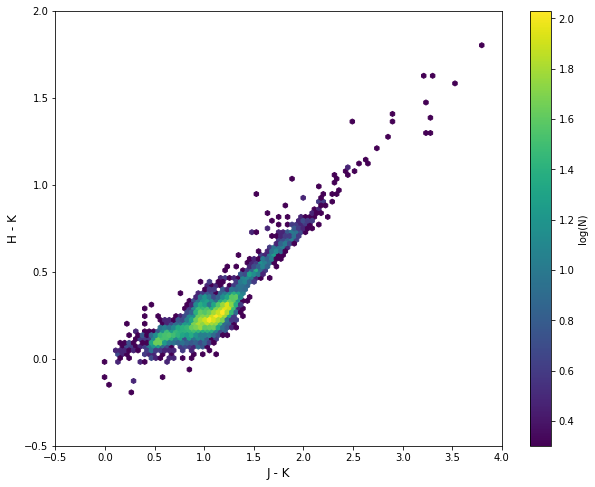

In [108]:
# H - K vs. J - K
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSk,filter_phot_data.hMINUSk,',')
plt.xlim(-0.5, 4.0)
plt.ylim(-0.5, 2.0)
plt.xlabel('J - K', size=12)
plt.ylabel('H - K', size=12)
#plt.savefig('H-K_vs_J-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 4.0)
plt.ylim(-0.5, 2.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSk, filter_phot_data.hMINUSk, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 4.0, -0.5, 2.0))
ax1.set_xlabel('J - K', size=12)
ax1.set_ylabel('H - K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('H-K_vs_J-K_hist.pdf')

In [49]:
# Okay, there you have it!